In [1]:
import numpy as np
import pandas as pd
from plotnine import *
import statistics

from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import GridSearchCV

import plotly.graph_objects as go
import plotly.express as px

In [2]:
# Usaremos o dataset no qual mediremos o comprimento de um cateter (em cm) de acordo com a altura (em metros) do paciente
df = pd.DataFrame(data=[[1.087, 37], [1.613, 50], [0.953, 34], [1.003, 36], [1.156,43], [0.978, 28], [1.092, 37], [0.572, 20], [0.940, 34], [0.597, 30], [0.838, 38], [1.473, 47]], columns=['Altura', 'Comprimento'])

In [3]:
df

,Altura,Comprimento
0,1.087,37
1,1.613,50
2,0.953,34
3,1.003,36
4,1.156,43
5,0.978,28
6,1.092,37
7,0.572,20
8,0.940,34
9,0.597,30


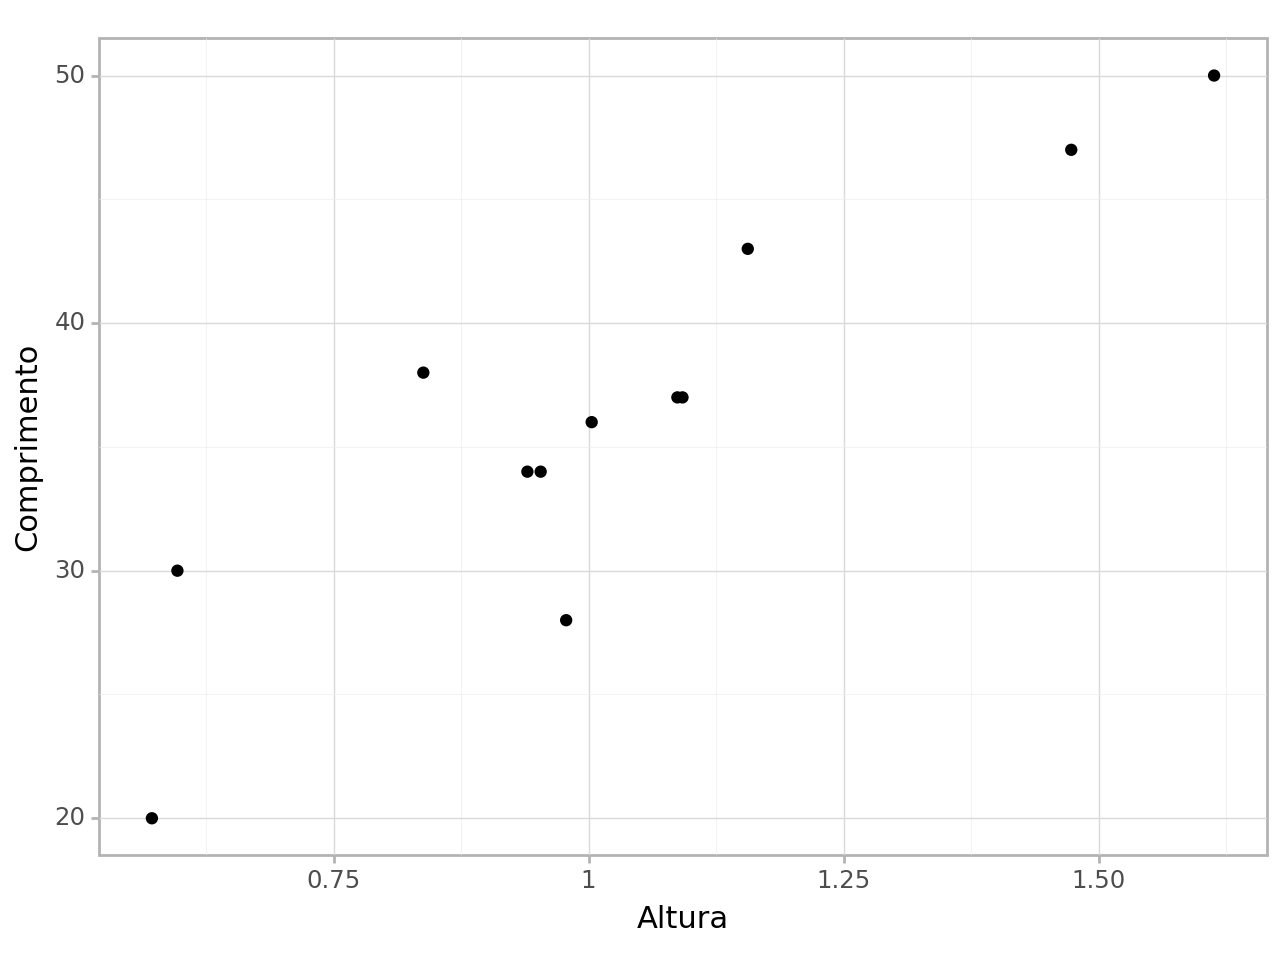

<Figure Size: (640 x 480)>

In [4]:
(ggplot(df, aes('Altura', 'Comprimento')) + geom_point() + theme_light())

In [5]:
df_shuffle = df.copy()
len(df_shuffle)

12

In [6]:
w0 = 10 # Termo independente
w1 = 20 # Coeficiente angular
alfa = 0.001 # Taxa de aprendizado
EQM = [] # Erro Quadrado Médio por época
w0_list = []
w1_list = []

for epoca in range(1000):
    acc = 0
    erro = 0
    sumw0 = 0
    sumw1 = 0

    tamanho_df_shuffle = len(df_shuffle)
    for i in range(tamanho_df_shuffle):
        x_i = df_shuffle.iloc[i, 0]
        y_i = df_shuffle.iloc[i, 1]

        erro = (y_i - w1 * x_i - w0)
        sumw0 += erro 
        sumw1 += erro * x_i
        acc += erro * erro

    w0 += alfa * (sumw0 / tamanho_df_shuffle)
    w1 += alfa * (sumw1 / tamanho_df_shuffle)

    w0_list.append(w0)
    w1_list.append(w1)

    EQM.append(acc / tamanho_df_shuffle)

In [7]:
print(w0, w1)

12.343024298110999 22.60158300659572


In [8]:
w0_list

[10.005663333333333,
 10.011314698568585,
 10.01695412078279,
 10.022581625000447,
 10.028197236193629,
 10.033800979282091,
 10.039392879133386,
 10.044972960562966,
 10.050541248334296,
 10.056097767158965,
 10.061642541696786,
 10.067175596555915,
 10.072696956292951,
 10.07820664541305,
 10.08370468837003,
 10.089191109566476,
 10.094665933353852,
 10.100129184032605,
 10.105580885852275,
 10.111021063011599,
 10.116449739658616,
 10.121866939890777,
 10.12727268775505,
 10.132667007248024,
 10.138049922316014,
 10.143421456855172,
 10.148781634711584,
 10.154130479681381,
 10.159468015510841,
 10.164794265896493,
 10.170109254485222,
 10.175413004874377,
 10.180705540611866,
 10.185986885196268,
 10.191257062076932,
 10.19651609465408,
 10.20176400627891,
 10.207000820253704,
 10.21222655983192,
 10.217441248218307,
 10.222644908568997,
 10.227837563991608,
 10.233019237545353,
 10.238189952241132,
 10.243349731041642,
 10.248498596861467,
 10.253636572567192,
 10.258763680977493,

In [9]:
w1_list

[20.00614999,
 20.012287192872723,
 20.018411635402988,
 20.024523344319505,
 20.030622346294987,
 20.036708667946268,
 20.042782335834424,
 20.04884337646488,
 20.054891816287537,
 20.060927681696885,
 20.066950999032116,
 20.072961794577243,
 20.078960094561214,
 20.08494592515803,
 20.09091931248686,
 20.096880282612148,
 20.10282886154374,
 20.108765075236985,
 20.114688949592864,
 20.120600510458093,
 20.126499783625242,
 20.13238679483284,
 20.1382615697655,
 20.144124134054028,
 20.149974513275527,
 20.155812732953525,
 20.161638818558075,
 20.16745279550587,
 20.17325468916036,
 20.179044524831852,
 20.184822327777635,
 20.190588123202087,
 20.196341936256776,
 20.20208379204058,
 20.207813715599798,
 20.21353173192826,
 20.21923786596743,
 20.224932142606523,
 20.230614586682613,
 20.236285222980737,
 20.24194407623401,
 20.24759117112373,
 20.253226532279495,
 20.2588501842793,
 20.26446215164965,
 20.270062458865663,
 20.275651130351193,
 20.28122819047892,
 20.2867936635704

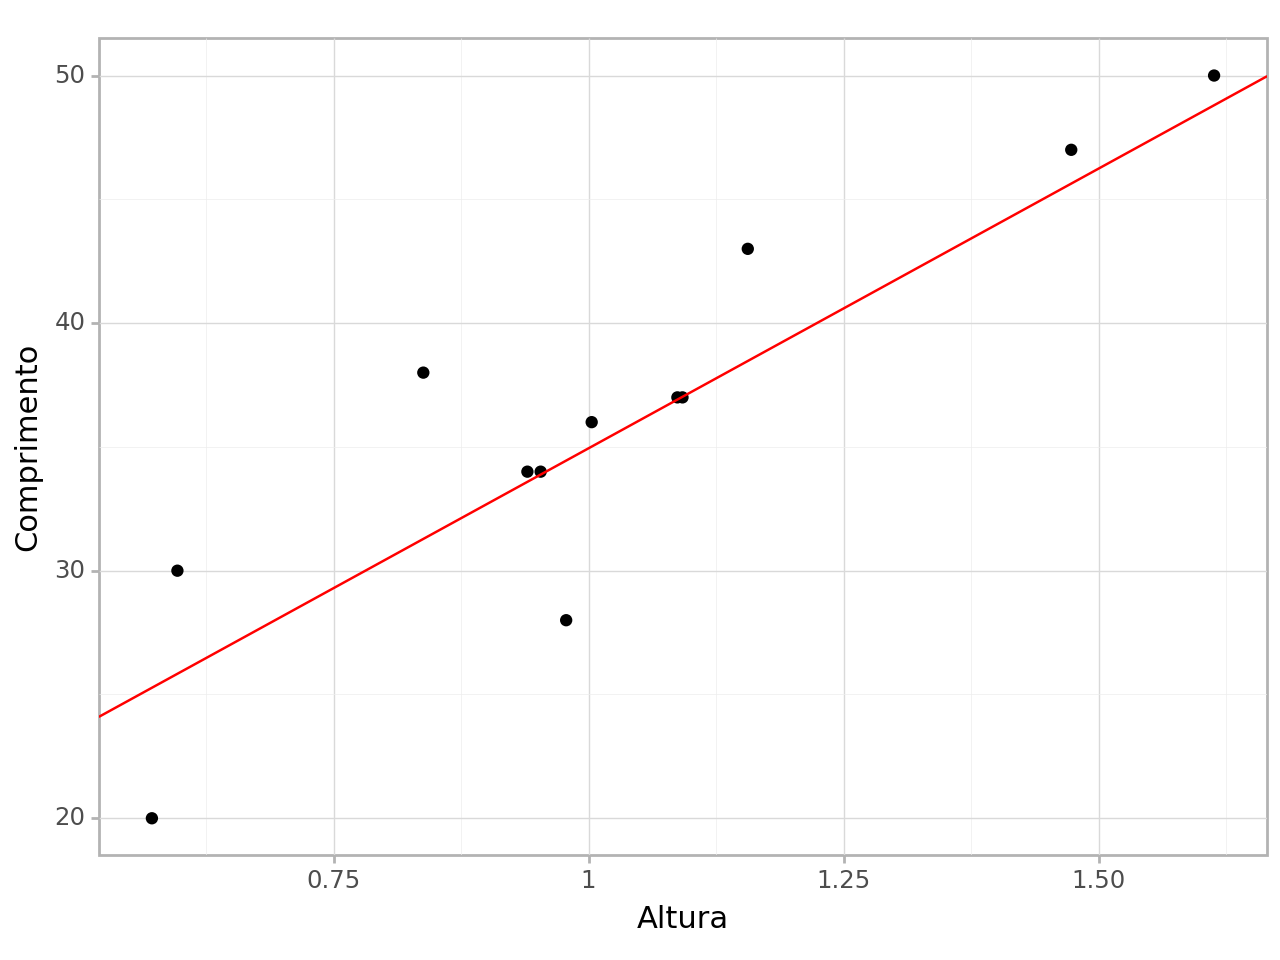

<Figure Size: (640 x 480)>

In [10]:
(ggplot(df, aes('Altura', 'Comprimento'))
 + geom_point()
 + theme_light()
 + geom_abline(intercept = w0, slope = w1, color='red')
)

In [11]:
def predict_(w0, w1, x):
    y = w1 * x + w0
    return y

In [12]:
predict_(w0, w1, 1.8)

53.025873709983294

In [13]:
EQM_df = pd.DataFrame(EQM)
EQM_df

,0
0,45.933533
1,45.793888
2,45.654828
3,45.516349
4,45.378450
...,...
995,13.076960
996,13.074801
997,13.072651
998,13.070510


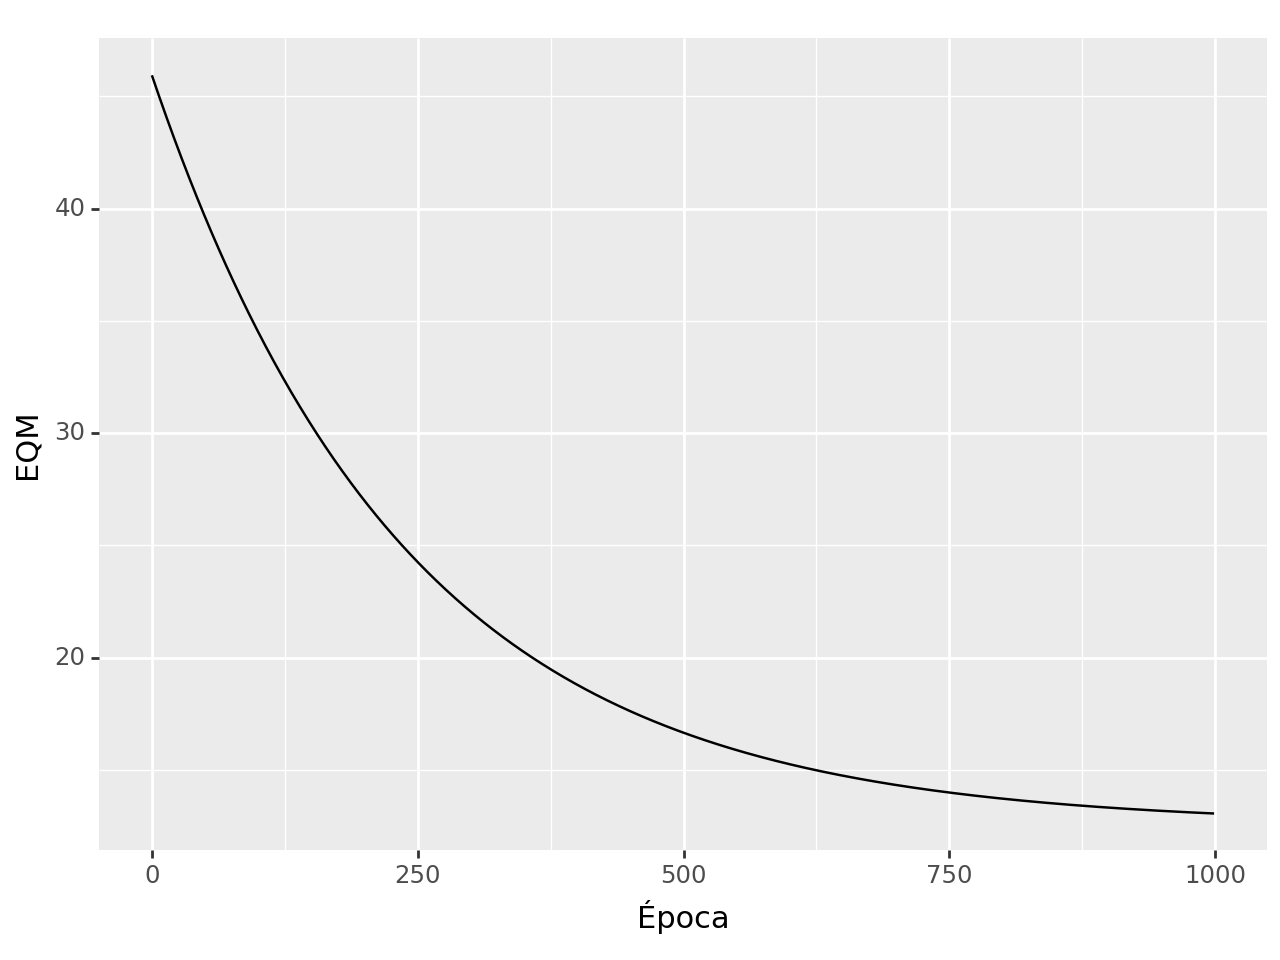

<Figure Size: (640 x 480)>

In [14]:
(ggplot(EQM_df, aes(EQM_df.index, EQM_df[0]))
    + geom_line()
    + xlab('Época')
    + ylab('EQM')
)